# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os


# TODO: Fill this in based on where you saved the training and testing data
cd = os.getcwd()
data_dir = os.path.join(cd,"traffic-signs-data")

training_file = os.path.join(data_dir,'train.p')
validation_file = os.path.join(data_dir,'valid.p')
testing_file = os.path.join(data_dir,'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)


# TODO: What's the shape of an traffic sign image?
x_train_np = np.array(x_train)
image_shape = x_train_np.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(np.concatenate((y_train, y_test, y_valid))) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# Visualizations will be shown in the notebook.
%matplotlib inline



In [4]:
# Subfunction for plotting all the classes

# imshow images in one row
def imshow_inrow(x_data,y_data,class_now,n_img,signname):

#   extract the image indices with the class of interest and shuffle the indices so the images are
#   not consecutively ordered
    class_ind = shuffle(np.argwhere(y_data==class_now))
    # The number of images to be plotted 
    n_img = min(n_img,len(class_ind))
    img_size = len(x_data[0])
    # determine the boundary between images    
    img_bound_thickness = 4
    img_bound_shape = [img_size,img_bound_thickness]
    if len(x_data.shape) == 4:
        img_bound_shape+= [3]
    img_bound = np.ones(img_bound_shape,np.uint8)
    
    img_list = []
    for ind in class_ind[:n_img]:
        x = x_data[ind[0]]
        img_list.append(img_bound)
        img_list.append(x)
    
    
    img_row = np.concatenate(img_list,1)
    if len(x_data.shape) == 3:
        plt.imshow(img_row,'gray')
    else:
        plt.imshow(img_row)
            
    plt.title("Class {}: {}".format(class_now,signname))
    plt.axis('off')
        
def imshow_allClassesRow(x_data,y_data,n_classes,signnames):
    plt.figure(figsize=[40,60])
    for class_now in range(n_classes):
        plt.subplot(n_classes*2,1,2*(class_now+1)-1)
        imshow_inrow(x_data,y_data,class_now,10, signnames[class_now+1])
        
def plotClass(x_data,y_data,class_now, signname):
    class_ind = np.argwhere(y_data==class_now)[0][0]
    plt.imshow(x_data[class_ind])
    plt.title("Class {}: {}".format(class_now,signname))
    plt.axis('off')
    
    
def plotAllClasses(x_data,y_data,n_classes):
    plt.figure(figsize=[20,55])
    for class_now in range(n_classes):
        plt.subplot(11,4,class_now+1)
        plotClass(x_data,y_data,class_now, signnames[class_now+1])


# This function plots the stats of the data to better visualize the dataset
# x_data : x data
# y_data : y data
# n_classes : number of classes
# data_type : type of the data "Training", "Testing", "Validation"
def plotStat(x_data,y_data,n_classes,data_type):
    mean_pixel = np.mean(x_data)
    stddev_pixel = np.std(x_data)
    
    plt.figure(figsize=[10,5])
    classes_hist = [len(np.argwhere(y_data==class_now)) for class_now in range(n_classes)]
    plt.grid('on',alpha=0.5)
    plt.gca().set_axisbelow(True)
    plt.hist(y_data,bins=range(n_classes),edgecolor='k')
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title("Statistics of the {} Dataset\nMean: {:.4f}\nSTD: {:1.4f}".format(data_type,mean_pixel,stddev_pixel))
    
    
# import the true label name from csv
with open(os.path.join(cd,"signnames.csv"),'r') as csvdata:
    signnames = [line.strip().split(',')[1] for line in csvdata]


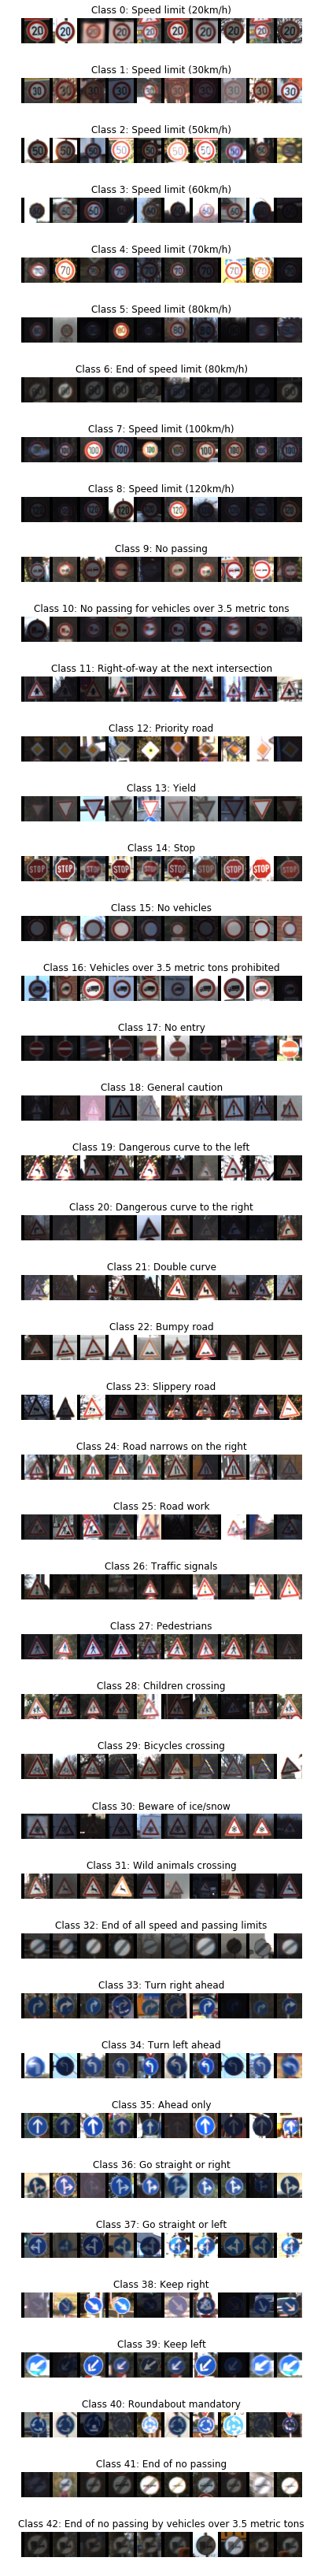

In [5]:
imshow_allClassesRow(x_train,y_train,n_classes,signnames)

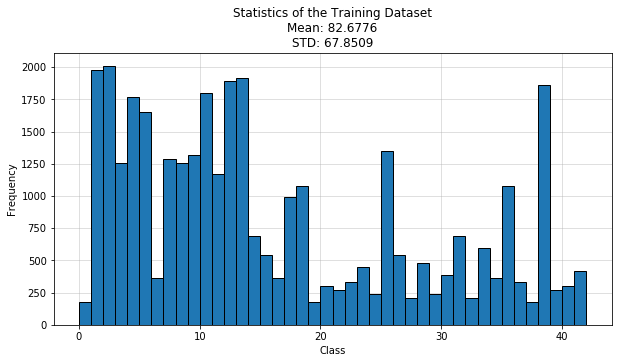

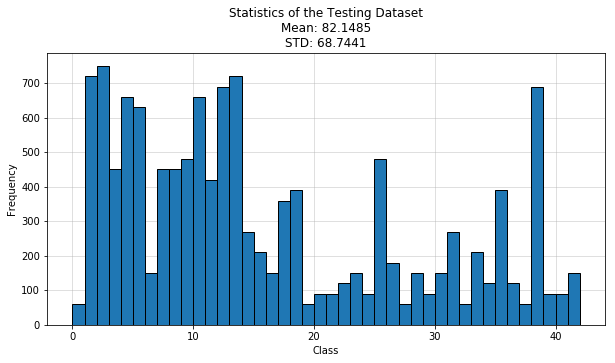

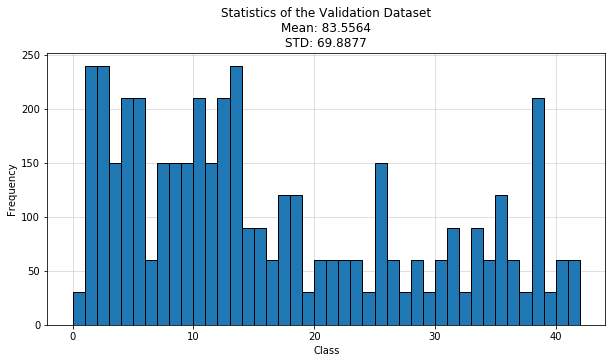

In [6]:
plotStat(x_train,y_train,n_classes,'Training')
plotStat(x_test,y_test,n_classes,'Testing')
plotStat(x_valid,y_valid,n_classes,'Validation')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre process data

In [7]:
# Define the full path of the pre-processed data 
savedir = os.path.join(cd,'traffic-signs-data')

x_train_processed_fname = os.path.join(savedir,'x_train_processed.p')
x_valid_processed_fname = os.path.join(savedir,'x_valid_processed.p')
x_test_processed_fname = os.path.join(savedir,'x_test_processed.p')

In [8]:
from skimage import exposure
import cv2

def grayScale_eposure(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = exposure.equalize_adapthist(img)
    return img
    
def preprocess_dataset(x_data):
    
    x_data_new = []
    for x in x_data:
        x_tmp = grayScale_eposure(x)
        x_data_new.append(x_tmp)

    return x_data_new


In [9]:
def save_data(x_data_processed_fname,x_data_processed):
    with open(x_data_processed_fname,'wb') as f:
        pickle.dump(x_data_processed,f)

def check_and_load(x_data_processed_fname,x_data):
    if not os.path.exists(x_data_processed_fname):
        x_data_processed = preprocess_dataset(x_data)
        save_data(x_data_processed_fname,x_data_processed)
    else:
        with open(x_data_processed_fname, mode='rb') as f:
            x_data_processed = pickle.load(f)
    return x_data_processed
    

In [10]:
x_train_processed = check_and_load(x_train_processed_fname,x_train)
x_valid_processed = check_and_load(x_valid_processed_fname,x_valid)
x_test_processed  = check_and_load(x_test_processed_fname,x_test)

(34799, 32, 32)


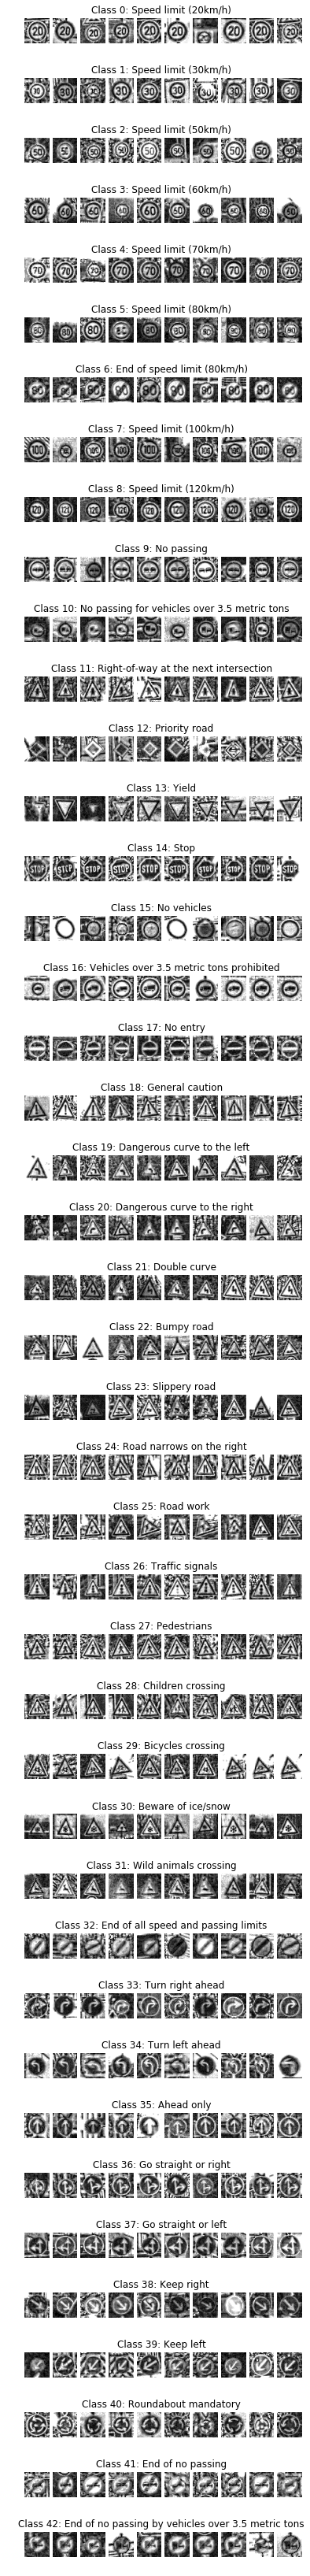

In [11]:
x_train_proccessed = np.array(x_train_processed)
print(x_train_proccessed.shape)
imshow_allClassesRow(x_train_proccessed,y_train,n_classes,signnames)

### Augment Data to Balance the Number of Training Data per Class

As seen in the statistics of the data, the frequency of data per class differs a lot for each class. In order to prevent biased training towards more frequent training data, I used methods suchs as 
* random rotation (-30 degrees to 30 degrees)
* translation (-4 to 4 pixels)
* zoom (0.75 to 1.25)
* flip (along x and y) 


In [12]:
import cv2

def rotate_bound(image, angle):
    # ref: http://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/     
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    img_r = cv2.warpAffine(image, M, (nW, nH))
    left_id = (nW - w)//2
    right_id = w + left_id
    return img_r[left_id:right_id,left_id:right_id]
 

def zoom(img,scale):
    row,col = img.shape[:2]
    pts_in = np.float32([[0,0],[0,32],[32,0],[32,32]])
    pts_out = (pts_in-row/2.)*scale + row/2.
    
    M = cv2.getPerspectiveTransform(pts_in,pts_out)
    
    dst = cv2.warpPerspective(img,M,(col,row))
    return dst
    
def translation(img,tx,ty):
    # +tx : right -tx :left
    # +ty : down -ty : up    
    rows,cols = img.shape[:2]

    M = np.float32([[1,0,tx],[0,1,ty]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

def rand_inRange(r):
    return np.random.random()*np.diff(r)[0] + min(r)

def random_transformation(img,rot_range=[-45,45],zoom_range=[0.75,1.25],txy_range=[4,4]):
    # rot_range: rotation range (min rot max rot)
    # zoom range: [min_zoom max_zoom]
    # txy_range : [max_tx, max_ty] min values are 0
    deg = rand_inRange(rot_range)
    scale = rand_inRange(zoom_range)
    tx = rand_inRange([0,txy_range[0]])
    ty = rand_inRange([0,txy_range[1]])
    img = translation(img,tx,ty)
    img = rotate_bound(img,deg)
    img = zoom(img,scale)
    
    return img

(<matplotlib.image.AxesImage at 0x13e48b2e8>,
 (-0.5, 31.5, 31.5, -0.5),
 <matplotlib.text.Text at 0x13e4669b0>)

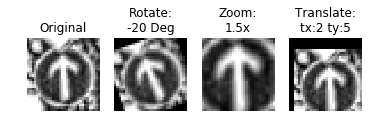

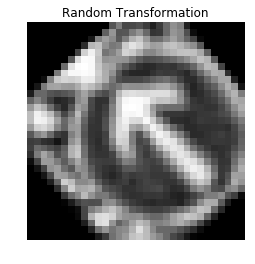

In [13]:
# === Visualize the transformations ====
img = x_train_proccessed[20000]

deg = -20
img_r = rotate_bound(img,deg)

scale = 1.5
img_z = zoom(img,scale)

tx = 2
ty = 5
img_t = translation(img,tx,ty)

plt.figure()
plt.subplot(1,4,1), plt.imshow(img,'gray'), plt.title("Original"), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(img_r,'gray'),plt.title("Rotate:\n{} Deg".format(deg)), plt.axis('off')
plt.subplot(1,4,3), plt.imshow(img_z,'gray'),plt.title("Zoom:\n{}x".format(scale)), plt.axis('off')
plt.subplot(1,4,4), plt.imshow(img_t,'gray'),plt.title("Translate:\ntx:{} ty:{}".format(tx,ty)), plt.axis('off')

img_tot = random_transformation(img)
plt.figure()
plt.imshow(img_tot,'gray'), plt.axis('off'), plt.title("Random Transformation")


## Generate more data with random transformations

In [14]:
def getN_more_per_class(y_data,n_classes,n_data_min=1000):
    frequencies = np.histogram(y_data,bins=range(n_classes))[0]
    N_more_per_class = [max(n_data_min-f,0) for f in frequencies]

#     N_more_per_class = np.max(frequencies) - frequencies
    return N_more_per_class

def generate_more_training_data(x_train,y_train,n_classes):
    N_more_per_class = getN_more_per_class(y_train,n_classes)
    x_train_aug = []
    y_train_aug = []
    for ii,n in enumerate(N_more_per_class):
        # n = number of data needed for ii_th class
        for _ in range(n):
            # pick a random image from current class
            class_ind = shuffle(np.argwhere(y_train==ii))
            x_now = x_train[class_ind[0][0]]
            
            x_aug = random_transformation(x_now,rot_range=[-2,2],zoom_range=[0.95,1.05],txy_range=[2,2])
            x_train_aug.append(x_aug)
            y_train_aug.append(ii)
    return x_train_aug,y_train_aug

In [15]:
x_train_aug,y_train_aug = generate_more_training_data(x_train_proccessed,y_train,n_classes)

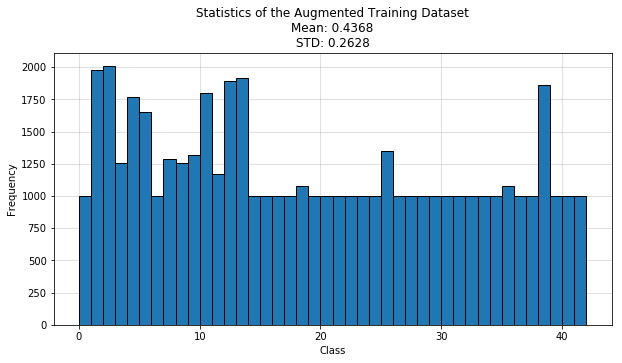

In [16]:
x_train_new = np.concatenate([x_train_proccessed,np.array(x_train_aug)],0)
y_train_new = np.concatenate([y_train,np.array(y_train_aug)],0)
plotStat(x_train_new,y_train_new,n_classes,'Augmented Training')

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# ==== Pre process subfunctions ===

# from sklearn.utils import shuffle

# x_train, y_train = shuffle(x_train, y_train)

# Normalize the dataset to have 0 mean and unit std
def normalize_image(x_data):
    # convert the x data to np.array and convert the data type to float
    x_data = np.array(x_data).astype(float)
    x_mean = np.mean(x_data)
    x_std = np.std(x_data)
    x_data_norm = (x_data - x_mean)/x_std
    
    return x_data_norm  
# encode the y data such that only the n_th class is 1 and other is 0
def oneHotEncoder(y_data,n_classes):
    nData = len(y_data)
    y_data_oneHot = np.zeros([nData,n_classes])
    y_data_oneHot[np.arange(nData), y_data] = 1
    return y_data_oneHot

In [18]:
y_train_oneHot = oneHotEncoder(y_train_new,n_classes)
y_valid_oneHot = oneHotEncoder(y_valid,n_classes)
y_test_oneHot = oneHotEncoder(y_test,n_classes) 

# convert all the X data to np array to make the manipulation easier
x_train_norm = normalize_image(x_train_new)
x_test_norm = normalize_image(x_test_processed)
x_valid_norm = normalize_image(x_valid_processed)

(<matplotlib.image.AxesImage at 0x1600f1550>, (-0.5, 31.5, 31.5, -0.5))

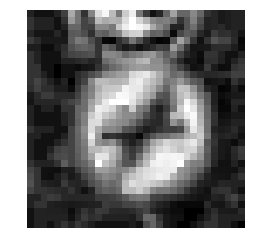

In [19]:
plt.imshow(x_train_norm[0],'gray'), plt.axis('off')

In [20]:
# Plot the stats of the three types of dataset to ensure the normalization processed correctly
def printStat(x_data,data_type):
    print("Statistics of the {} Data: \n\tMean = {:1.4f}\n\tSTD = {:1.4f}\n".format(data_type,np.mean(x_data),np.std(x_data)))

printStat(x_train_norm,"Normalized Training")
printStat(x_test_norm,"Normalized Testing")
printStat(x_valid_norm,"Normalized Validation")

Statistics of the Normalized Training Data: 
	Mean = 0.0000
	STD = 1.0000

Statistics of the Normalized Testing Data: 
	Mean = 0.0000
	STD = 1.0000

Statistics of the Normalized Validation Data: 
	Mean = 0.0000
	STD = 1.0000



### Model Architecture

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [22]:
import tensorflow as tf 
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [23]:
class inceptionClassifier(object):
    def __init__(self,x,y,rand_mu=0.0,rand_std=0.1):
        self.rand_mu = rand_mu
        self.rand_std = rand_std
        self.inception_layer_counter = 0
        self.x_in = x
        self.x = x
        self.y = y
        self.keep_prob = tf.placeholder(tf.float32)

    # private methods fo building the model
    
    def _conv2d(self,filter_dim,strides=[1,1,1,1],padding='SAME',activation=tf.nn.relu):
        with tf.variable_scope("conv2d"):
            filter_w = tf.Variable(tf.truncated_normal(filter_dim,mean=self.rand_mu,stddev=self.rand_std))
            filter_b = tf.Variable(tf.truncated_normal([filter_dim[-1]],mean=self.rand_mu,stddev=self.rand_std))
            x_out = tf.nn.conv2d(self.x,filter_w,strides=strides,padding=padding)
            x_out = tf.nn.bias_add(x_out,filter_b)
            if activation:
                x_out = activation(x_out)
            self.x = x_out
        
    def _get_in_channels(self):
        return self.x.get_shape().as_list()[-1]
    
    def _conv1x1(self,out_channels): 
        with tf.variable_scope("conv1x1"):
            filter_dim = [1,1,self._get_in_channels(),out_channels]
            self._conv2d(filter_dim)

    def _conv3x3(self,out_channels,reduced_dim):
        with tf.variable_scope("conv3x3"):
            self._conv1x1(reduced_dim)
            filter_dim = [3,3,self._get_in_channels(),out_channels]
            self._conv2d(filter_dim)

    def _conv5x5(self,out_channels,reduced_dim):
        with tf.variable_scope("conv5x5"):
            self._conv1x1(reduced_dim)
            filter_dim = [5,5,self._get_in_channels(),out_channels]
            self._conv2d(filter_dim)

    def _pool3x3(self,out_channels,ksize=[1,3,3,1],strides = [1,1,1,1]):
        with tf.variable_scope("pool3x3"):
            padding = 'SAME'
            self.x = tf.nn.max_pool(self.x,ksize=ksize,strides=strides,padding=padding)
            self._conv1x1(out_channels)
    
    def _reset_x(self,x_in,x_inception_list):
        x_inception_list.append(self.x)
        self.x = x_in 

    # out_channels_list : list of output channel dimensions for [conv3x3,conv5x5,maxpool3x3,conv1x1]
    # dim_reduction_list : list of dim reductions for [conv3x3,conv5x5]
    def _inception_module(self, out_channels_list,dim_reduction_list):
        with tf.variable_scope("inception_{}".format(self.inception_layer_counter)):
            # make a copy of x to run parallel operations on the same inpu
            x_inception_list = []

            x_in = self.x

            self._conv1x1(out_channels_list[3])
            self._reset_x(x_in,x_inception_list)
            self._conv3x3(out_channels_list[0],dim_reduction_list[0])
            self._reset_x(x_in,x_inception_list)
            self._conv5x5(out_channels_list[1],dim_reduction_list[1])
            self._reset_x(x_in,x_inception_list)
            self._pool3x3(out_channels_list[2])
            self._reset_x(x_in,x_inception_list)
            self.x = tf.concat(values=x_inception_list,axis=3)

            
        self.inception_layer_counter+=1


    def _fc(self,n_perceptrons,activation=None):

        if len(self.x.get_shape().as_list()) > 2 :
            self.x  = flatten(self.x)

        with tf.variable_scope("fc"):
            fc_w = tf.Variable(tf.truncated_normal([self._get_in_channels(), n_perceptrons],mean=self.rand_mu,stddev=self.rand_std))
            fc_b = tf.Variable(tf.truncated_normal([n_perceptrons],mean=self.rand_mu,stddev=self.rand_std))
            x_out =  tf.nn.bias_add( tf.matmul(self.x,fc_w) , fc_b )
            if activation:
                x_out = activation(x_out)
        self.x = x_out

    def _pool(self,ksize,strides,padding,pool_fn=tf.nn.max_pool):
        self.x = pool_fn(self.x,ksize=ksize,strides=strides,padding=padding)

    def _parse_layer_dict(self,layer_dict):
        if layer_dict['layerType'] == 'conv':
            layer_func = self._conv2d
            filter_dim = layer_dict['filterShape'] + [self._get_in_channels(), layer_dict['out_channels']]
            layer_dict['filter_dim'] = filter_dim
            del layer_dict['filterShape']
            del layer_dict['out_channels']

        elif layer_dict['layerType'] == 'pool':
            layer_func = self._pool

        elif layer_dict['layerType'] == 'inception':
            layer_func = self._inception_module

        elif layer_dict['layerType'] == 'fc':
            layer_func = self._fc
        del layer_dict['layerType']
        return layer_func

    def buildModel(self,layer_dict_list):
        for layer_dict in layer_dict_list:
            layer_func = self._parse_layer_dict(layer_dict)
            layer_func(**layer_dict)
            self.x = tf.nn.dropout(self.x, self.keep_prob)
            print(self.x)

    def _generateOperations(self,learning_rate=0.001):
        self.loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.x, labels=self.y))
        opt = tf.train.AdamOptimizer(learning_rate)
        self.train_op = opt.minimize(self.loss_op)
        # self.train_op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss_op)
        correct_prediction = tf.equal(tf.argmax(self.x, 1), tf.argmax(self.y, 1))
        self.accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        prob = tf.nn.softmax(self.x)
        self.top5_op = tf.nn.top_k(prob,k=5)

    def _divide_batch(self,x_data,y_data):

        x_data,y_data = shuffle(x_data,y_data)
        n_data = len(x_data)
        x_data_batch = []
        y_data_batch = []
        for i_begin,i_end in zip(range(0,n_data,self.batch_size), range(self.batch_size,n_data+self.batch_size,self.batch_size)):
            i_end = min(i_end, n_data)
            x_data_batch.append(x_data[i_begin:i_end])
            y_data_batch.append(y_data[i_begin:i_end])

        return x_data_batch,y_data_batch

    def evaluate(self, x_valid, y_valid, sess):
        x_valid_batch,y_valid_batch = self._divide_batch(x_valid, y_valid)
        acc_sum = 0.0
        for x_valid_now,y_valid_now in zip(x_valid_batch,y_valid_batch):
            feed_dict = {self.x_in: x_valid_now,
                         self.y: y_valid_now,
                         self.keep_prob: 1.0}
            acc = sess.run(self.accuracy_op,feed_dict=feed_dict)
            acc_sum += acc * len(x_valid_now)
        acc_valid = acc_sum / len(x_valid)
        return acc_valid
    
    def get_top5(self,x_data,y_data,sess):
        feed_dict = {self.x_in: x_data,
                     self.y: y_data,
                     self.keep_prob: 1.0}
        top5 = sess.run(self.top5_op,feed_dict=feed_dict)
        return top5


    def train(self,x_train,y_train,x_valid,y_valid,n_epoch,batch_size,learning_rate,keep_prob):
        
        sess_saveName = './inception_model_epoch{:0>3}.ckpt'.format(n_epoch)
        training_info_saveName = './training_info.p'
        self.sess_saveName = sess_saveName
        self.batch_size = batch_size
        self.n_epoch = n_epoch
        self._generateOperations(learning_rate)

        x_train_batch,y_train_batch = self._divide_batch(x_train,y_train)
        total_batch = int(np.ceil(len(x_train)/self.batch_size))
        saver = tf.train.Saver()
        with tf.Session() as sess:
            print(sess_saveName)
            if os.path.exists(sess_saveName+".index") :#and os.path.exist(training_info_saveName):
                saver.restore(sess, sess_saveName)
                print("Session Resotred")
                with open(training_info_saveName,'rb') as f:
                    training_result = pickle.load(f)
                self.acc_valid_epoch = training_result['acc_valid_epoch']
                self.acc_train_epoch = training_result['acc_train_epoch']
                self.loss_epoch = training_result['loss_epoch']
            else:
                sess.run(tf.global_variables_initializer())
                self.acc_train_epoch = []
                self.acc_valid_epoch = []
                self.loss_epoch = []


                for ii in range(n_epoch):   
                    acc_sum = 0
                    loss_sum = 0
                    for (batch_now,x_train_now),y_train_now in zip(enumerate(x_train_batch),y_train_batch):
                        feed_dict = {self.x_in: x_train_now,
                                     self.y: y_train_now,
                                     self.keep_prob: keep_prob}

                        [tr,loss,acc] = sess.run([self.train_op,self.loss_op,self.accuracy_op],feed_dict=feed_dict)
                        acc_sum += acc*len(x_train_now)
                        loss_sum += loss*len(x_train_now)
                        if batch_now % 10 == 0:
                            acc_valid = self.evaluate(x_valid,y_valid,sess)
                            print("EPOCH[{:0>3}] batch {:0>3}/{} : loss = {:>5.2f} train accuracy = {:>5.2f}% | valid accuracy = {:>5.2f}%". \
                                format(ii,batch_now,total_batch,loss,acc*100,acc_valid*100))

                    acc_valid = self.evaluate(x_valid,y_valid,sess)
                    self.acc_valid_epoch.append(acc_valid)    
                    self.acc_train_epoch.append(acc_sum/len(x_train))
                    self.loss_epoch.append(loss_sum/len(x_train))
                with open(training_info_saveName,'wb') as f:
                    training_result = {'acc_valid_epoch':self.acc_valid_epoch,
                                       'acc_train_epoch':self.acc_train_epoch,
                                       'loss_epoch':self.loss_epoch}
                    pickle.dump(training_result,f)
                saver.save(sess,sess_saveName)
   
        


In [24]:
def inception():
    n_classes = 43

    # 28x28x32
    L1 = {
        'layerType'    : 'conv',
        'filterShape'  : [5,5],
        'out_channels' : 32,
        'padding'      : 'VALID',
        'activation'   : tf.nn.relu
    }

    # 14x14x32
    L2 = {
        'layerType' : 'pool',
        'ksize'     : [1,2,2,1],
        'strides'   : [1,2,2,1],
        'padding'   : 'VALID'
    }

    # 14x14x128
    L3 = {
        'layerType'          : 'inception',
        'out_channels_list'  : [32,32,32,32],
        'dim_reduction_list' : [16,16]
    }

    # 7x7x128
    L4 = {
        'layerType' : 'pool',
        'ksize'     : [1,2,2,1],
        'strides'   : [1,2,2,1],
        'padding'   : 'VALID'
    }

    # 7x7x256
    L5 = {
        'layerType'          : 'inception',
        'out_channels_list'  : [64,64,64,64],
        'dim_reduction_list' : [32,32]
    }

    # 1x1x256
    L6 = {
        'layerType' : 'pool',
        'ksize'     : [1,2,2,1],
        'strides'   : [1,2,2,1],
        'padding'   : 'VALID',
        'pool_fn'   : tf.nn.avg_pool
    }

    L7 = {
        'layerType'     : 'fc',
        'n_perceptrons' : 128,
        'activation'    : tf.nn.relu 
    }

    L8 = {
        'layerType'     : 'fc',
        'n_perceptrons' : n_classes,
        'activation'    : tf.nn.relu 
    }
    layer_dict_list = []
    layer_dict_list.append(L1)
    layer_dict_list.append(L2)
    layer_dict_list.append(L3)
    layer_dict_list.append(L4)
    layer_dict_list.append(L5)
    layer_dict_list.append(L6)
    layer_dict_list.append(L7)
    layer_dict_list.append(L8)

    return layer_dict_list

def LeNet():
    L1 = {
        'layerType'    : 'conv',
        'filterShape'  : [5,5],
        'out_channels' : 6,
        'padding'      : 'VALID',
        'activation'   : tf.nn.sigmoid
    }

    L2 = {
        'layerType' : 'pool',
        'ksize'     : [1,2,2,1],
        'strides'   : [1,2,2,1],
        'padding'   : 'VALID'
    }

    L3 = {
        'layerType'    : 'conv',
        'filterShape'  : [5,5],
        'out_channels' : 16,
        'padding'      : 'VALID',
        'activation'   : tf.nn.sigmoid
    }

    L4 = {
        'layerType' : 'pool',
        'ksize'     : [1,2,2,1],
        'strides'   : [1,2,2,1],
        'padding'   : 'VALID'
    }

    L5 = {
        'layerType'     : 'fc',
        'n_perceptrons' : 120,
        'activation'    : tf.nn.sigmoid 
    }   

    L6 = {
        'layerType'     : 'fc',
        'n_perceptrons' : 84,
        'activation'    : tf.nn.sigmoid 
    }   

    L7 = {
        'layerType'     : 'fc',
        'n_perceptrons' : 43,
        'activation'    : None 
    }   
    layer_dict_list = []
    layer_dict_list.append(L1)
    layer_dict_list.append(L2)
    layer_dict_list.append(L3)
    layer_dict_list.append(L4)
    layer_dict_list.append(L5)
    layer_dict_list.append(L6)
    layer_dict_list.append(L7)


    return layer_dict_list

In [25]:

x_train_norm = x_train_norm.reshape((x_train_norm.shape[0],x_train_norm.shape[1],x_train_norm.shape[2])+ (1,))
x_valid_norm = x_valid_norm.reshape((x_valid_norm.shape[0],x_valid_norm.shape[1],x_valid_norm.shape[2])+ (1,))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0],x_test_norm.shape[1],x_test_norm.shape[2])+ (1,))

In [26]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32,[None,32,32,1])
y = tf.placeholder(tf.float32,[None,43])
ic = inceptionClassifier(x,y)

learning_rate = 0.01
keep_prob = 0.8
n_epoch = 50
batch_size = 100
layer_dict_list = LeNet()
ic.buildModel(layer_dict_list)


Tensor("dropout/mul:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 5, 5, 16), dtype=float32)
Tensor("dropout_4/mul:0", shape=(?, 120), dtype=float32)
Tensor("dropout_5/mul:0", shape=(?, 84), dtype=float32)
Tensor("dropout_6/mul:0", shape=(?, 43), dtype=float32)


In [ ]:
ic.train(x_train_norm,y_train_oneHot,x_valid_norm,y_valid_oneHot,n_epoch,batch_size,learning_rate,keep_prob)

./inception_model_epoch050.ckpt
INFO:tensorflow:Restoring parameters from ./inception_model_epoch050.ckpt
Session Resotred


In [ ]:
plt.figure(figsize=[12,8])

plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(ic.loss_epoch,'r--.')
plt.gca().set_yscale('log')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(ic.acc_train_epoch,'r--.',label='train')
plt.plot(ic.acc_valid_epoch,'b--.',label='valid')
plt.legend(loc='best')
plt.gca().set_yscale('log')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
### Test with the given test data
saver = tf.train.Saver()
with tf.Session() as sess:

    saver.restore(sess, ic.sess_saveName)

    acc_test = ic.evaluate(x_test_norm, y_test_oneHot, sess)
    print("Test accuracy on the given data: {:1.3f}%".format(acc_test*100))

In [ ]:
def plot_top5_prob(x_data,y_data,x_data_original,ic,sess):
    if len(x_data.shape) < 4:
        x_data = [x_data]
        y_data = [y_data]
    top5 = ic.get_top5(x_data, y_data, sess)
    class_true = np.argmax(y_data[0])
    plt.figure(figsize=[15,2])
    plt.subplot(1,2,1)
    x_data = np.array(x_data[0])
    plt.imshow(x_data_original)
    plt.axis('off')
    plt.title("True Class = {}".format(class_true))
    
    plt.subplot(1,2,2)
    plt.barh(range(5),top5[0][0],color='b',edgecolor='k')
    plt.yticks(range(5),top5[1][0])
    plt.grid('on',alpha=0.5)
    plt.gca().set_axisbelow(True)
    plt.gca().set_xlim([0,1])
    return top5

In [ ]:
ii = np.random.randint(0,1000)
x_data = x_test_norm[ii]
x_data_original = x_test[ii]
y_data = y_test_oneHot[ii]


saver = tf.train.Saver()
with tf.Session() as sess:

    saver.restore(sess, ic.sess_saveName)
    plot_top5_prob(x_data,y_data,x_data_original,ic,sess)

### Load and Output the Images

In [ ]:
### Reshape images to be 32 x 32
    
def downSample(im, target_shape = [32,32]):
    row,col = im.shape[:2]
    resize_ratio = [row//32, col//32]
    
    im_new = im[::resize_ratio[0],::resize_ratio[1]]
    return im_new[:32,:32]


In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
extra_images_load_dir = "./extra_test_img"
fnames = os.listdir(extra_images_load_dir)
fnames = [f for f in fnames if f.split(".")[1] == "jpg" ]
extra_images_path = [os.path.join(extra_images_load_dir,f) for f in fnames]
x_test_extra_original = [plt.imread(f) for f in extra_images_path]
x_test_extra = [downSample(im) for im in x_test_extra_original]
y_test_extra = [int(f.split('.')[0]) for f in fnames]


plt.figure()
n_im = len(x_test_extra)
for (ii,im),im_new in zip(enumerate(x_test_extra_original),x_test_extra):
    plt.subplot(2,n_im,ii+1)
    plt.imshow(im)
    plt.axis('off')
    plt.subplot(2,n_im,n_im+ii+1)
    plt.imshow(im_new)
    plt.axis('off')

In [ ]:
### Preprocess the extra testing data
x_test_extra_norm = normalize_image(preprocess_dataset(x_test_extra))
y_test_extra_oneHot = oneHotEncoder(y_test_extra,n_classes)

x_test_extra_norm = x_test_extra_norm.reshape(x_test_extra_norm.shape[:3]+(1,))

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
top5_list = []
with tf.Session() as sess:
    saver.restore(sess, ic.sess_saveName)
    for x_data,y_data,x_data_original in zip(x_test_extra_norm, y_test_extra_oneHot,x_test_extra):
        top5 = plot_top5_prob(x_data,y_data,x_data_original,ic,sess)
        top5_list.append(top5)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
n_correct = 0
for y_true,top5 in zip(y_test_extra,top5_list):
    top1 = top5[1][0][0]
    if top1 == y_true:
        n_correct += 1

print("{} out of {} Extra Test images were classified Correctly with accuracy of {:1.3f}".format(n_correct,len(y_test_extra),n_correct/len(y_test_extra)))


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for y_true,top5 in zip(y_test_extra,top5_list):
    print("True Class ------< {:>2} >------".format(y_true))
    top5_class_str = ""
    for t5,prob in zip(top5[1][0],top5[0][0]):
        top5_class_str+=("[{:>2}".format(t5))
        top5_class_str+=": {:.4f}]  ".format(prob)
    print(top5_class_str)
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.